In [48]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random as random
from calibration_util import *
%matplotlib inline
%precision %.4f

'%.4f'

In [49]:
def scale(data, col):
    data[col] = (data[col]-data[col].min()) / (data[col].max() - data[col].min())
    
# generate regression dataset
def generate(n_points, n_attr, n, r):
    data = pd.DataFrame()
    X1, y1 = make_regression(n_samples=n_points, n_features=n_attr, noise=n, random_state=r)
    g1 = np.zeros(int(len(X1)/2))
    g2 = np.ones(int(len(X1)/2))
    g = np.append(g1, g2)
    d1 = np.insert(X1, 5, values=y1, axis=1)
    data = pd.DataFrame(d1)
    data = data.sample(frac=1)
    data.columns = ['x0','x1','x2','x3','x4','y']
    data['g']=g
    #set y between 0 and 1,sort
    scale(data, 'y')
    data.sort_values('y', inplace=True)
    return data

In [50]:
data = generate(10000,5,0.2,99)

In [51]:
data.head()

,x0,x1,x2,x3,x4,y,g
8679,-0.620717,-0.634455,-1.145017,-3.735466,-3.675414,0.000000,1.0
5679,-1.284862,-0.993106,-1.043758,-2.310001,-2.566773,0.097937,0.0
8570,-2.189603,-1.227665,0.285228,-1.915179,-2.288695,0.110173,1.0
1693,-2.207989,-1.776297,-0.664650,-1.167179,-2.121819,0.114049,1.0
2350,-1.904276,-2.950238,-1.165516,-1.040818,-0.964168,0.117402,0.0


In [52]:
def under_rank(data, sample, scale, group):
    
    #randomly select some percentage of group to be under ranked
    data2 = data.copy()
    for i in range(len(data)):
        if(data2.iloc[i]['g'] == group):
            if(random.random() <sample):
                data2.iloc[i]['y'] = data2.iloc[i]['y']*(random.random()+scale)

    data2.sort_values('y', inplace=True)
    return data2

def shift_mean(data, sample, amt, group):
    #shift mean of group by some percentage
    data2 = data.copy()
    for i in range(len(data)):
        if(data2.iloc[i]['g'] == group):
            if(random.random() <sample):
                data2.iloc[i]['y'] = data2.iloc[i]['y']-amt
    scale(data2, 'y')
    return data2

def plot_rank(data):
    cmap = plt.cm.rainbow
    plt.rcParams['figure.figsize'] = (20, 4)
    fig, ax = plt.subplots()
    ax.bar(range(len(data)), data['y'], 0.5, color=cmap((data['g'])))
    ax.set_xlim([0,len(data)])
    ax.set_title("", fontsize=16)
    plt.show()

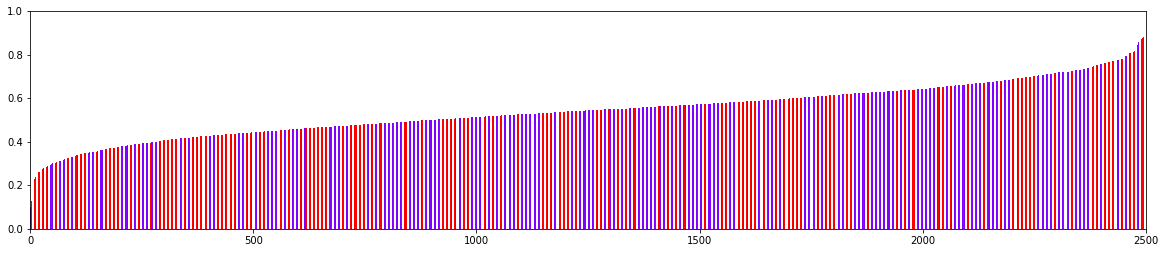

In [53]:
plot_rank(data.sample(frac=0.25).sort_values(['y']))

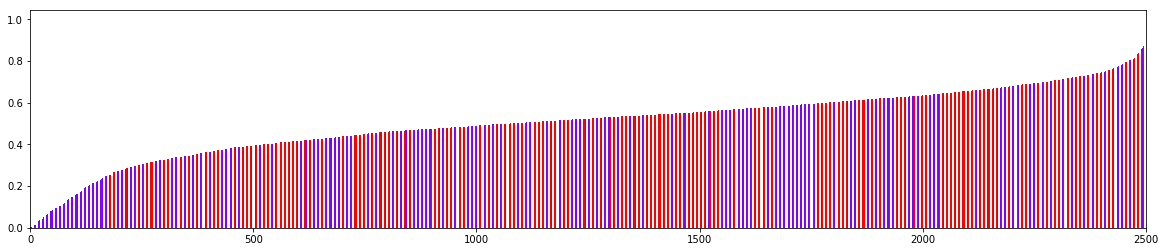

In [54]:
under_data = under_rank(data, .25, 0., 0.)
plot_rank(under_data.sample(frac=0.25).sort_values(['y']))

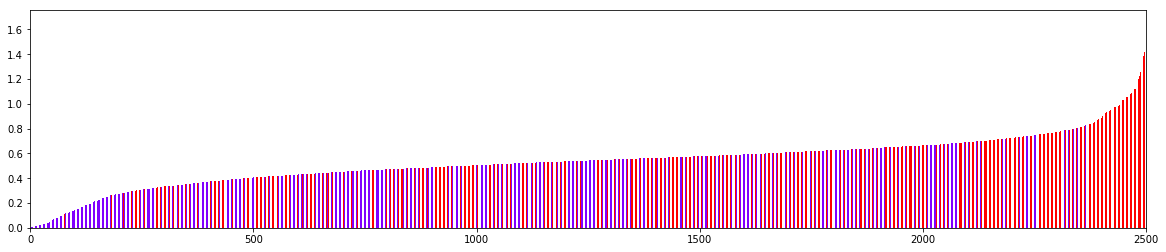

In [55]:
#shifting doesn't give you a smooth distribution, so scaling is preferred
over_data = under_rank(under_data, .25, 1., 1.)
plot_rank(over_data.sample(frac=0.25).sort_values(['y']))

In [56]:
df_under = data[['y','g']]
df_under['y_pred'] =under_data['y']
df_under.sort_index(inplace=True)
df_under.head()

C:\Users\Caitlin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Caitlin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,y,g,y_pred
0,0.651169,1.0,0.651169
1,0.796716,1.0,0.796716
2,0.547534,1.0,0.547534
3,0.682236,0.0,0.496292
4,0.691705,0.0,0.691705


C:\Users\Caitlin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Caitlin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


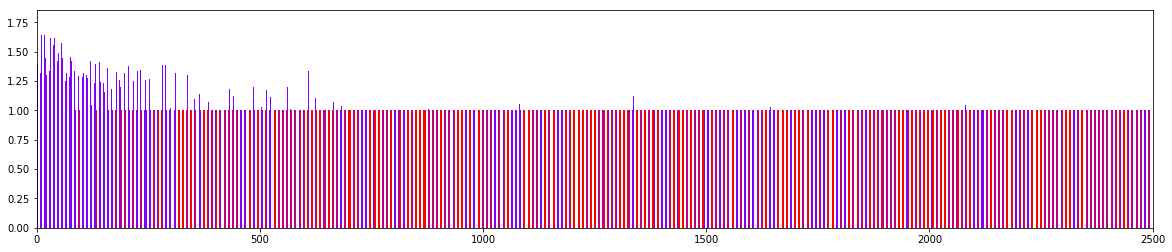

In [57]:
df_under['err']=df_under['y']-df_under['y_pred']
df_under['err']=df_under['err']+1
data=df_under.sample(frac=0.25).sort_values('y')
data =data.sort_values('y_pred')
cmap = plt.cm.rainbow
plt.rcParams['figure.figsize'] = (20, 4)
fig, ax = plt.subplots()
ax.bar(range(len(data)), data['err'], 0.5, color=cmap((data['g'])))
ax.set_xlim([0,len(data)])
ax.set_title("", fontsize=16)
plt.show()

In [58]:
df_over = data[['y','g']]
df_over['y_pred'] =over_data['y']
df_over.sort_index(inplace=True)
df_over.head()

C:\Users\Caitlin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Caitlin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,y,g,y_pred
1,0.796716,1.0,0.796716
3,0.682236,0.0,0.496292
10,0.360768,0.0,0.098439
12,0.392724,0.0,0.392724
18,0.505049,0.0,0.218923


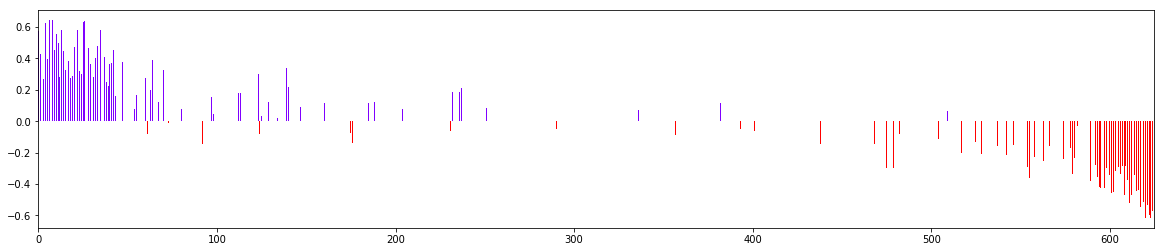

In [59]:
df_over['err']=df_over['y']-df_over['y_pred']
# df_over['err']=df_over['err']+1
data=df_over.sample(frac=0.25).sort_values('y')
data = data.sort_values('y_pred')
cmap = plt.cm.rainbow
plt.rcParams['figure.figsize'] = (20, 4)
fig, ax = plt.subplots()
ax.bar(range(len(data)), data['err'], 0.5, color=cmap((data['g'])))
ax.set_xlim([0,len(data)])
ax.set_title("", fontsize=16)
plt.show()

Plot predicted vs true for UNDERestimated group


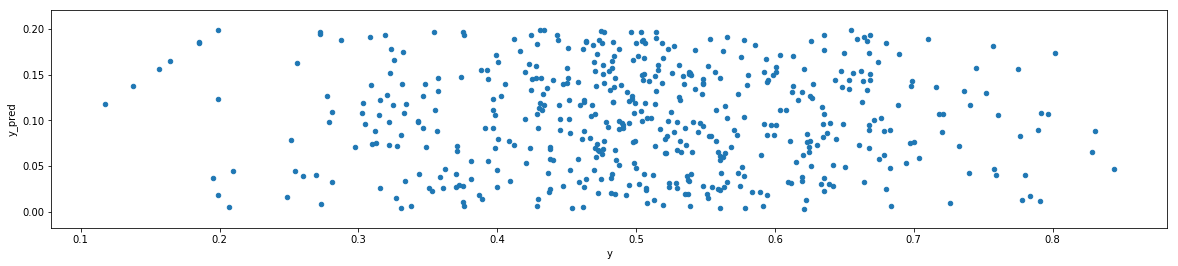

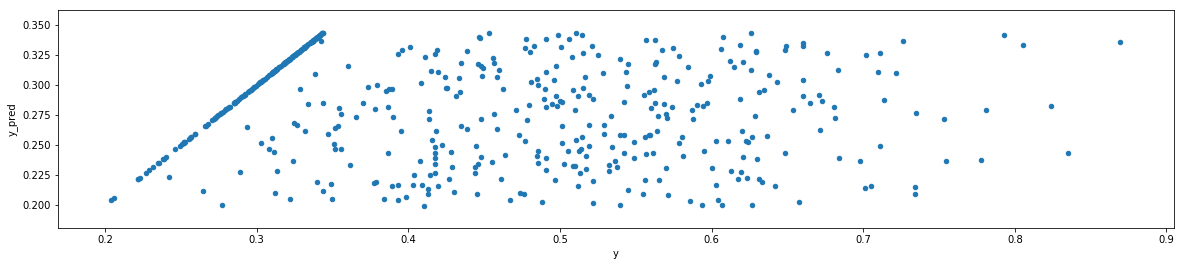

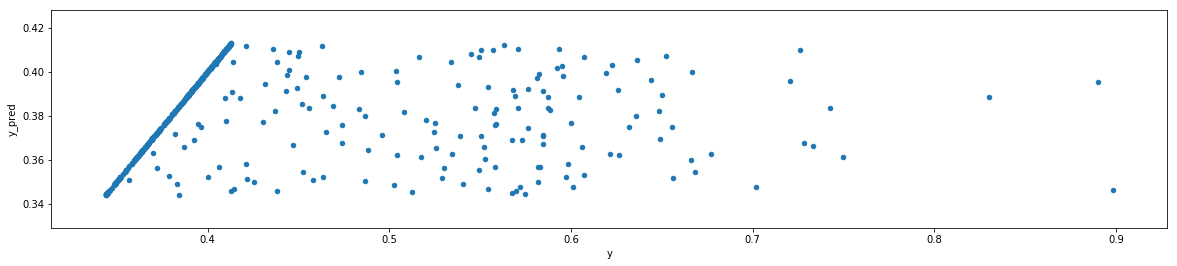

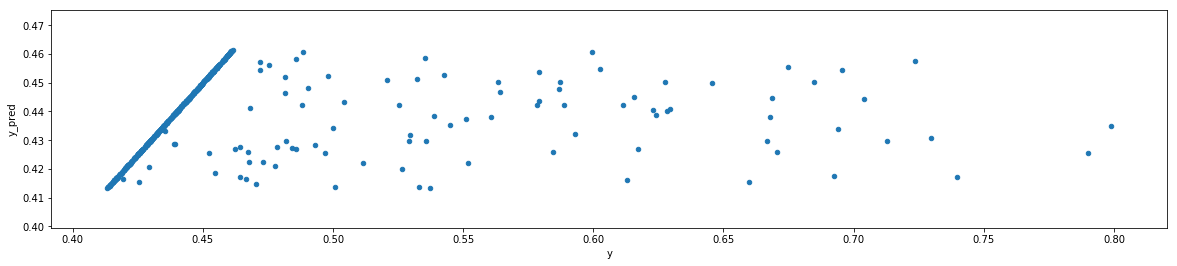

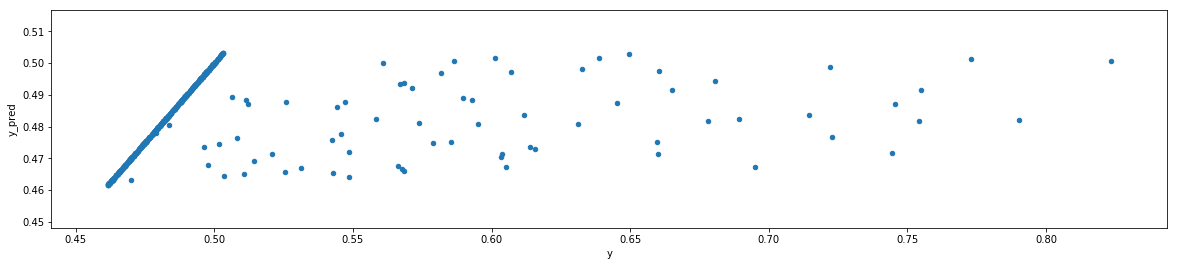

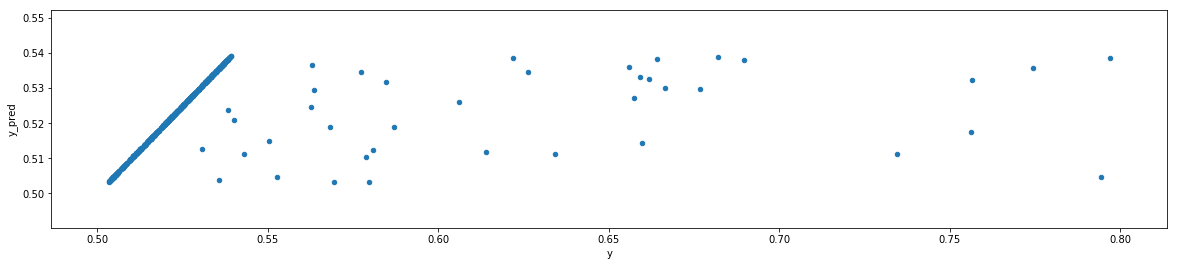

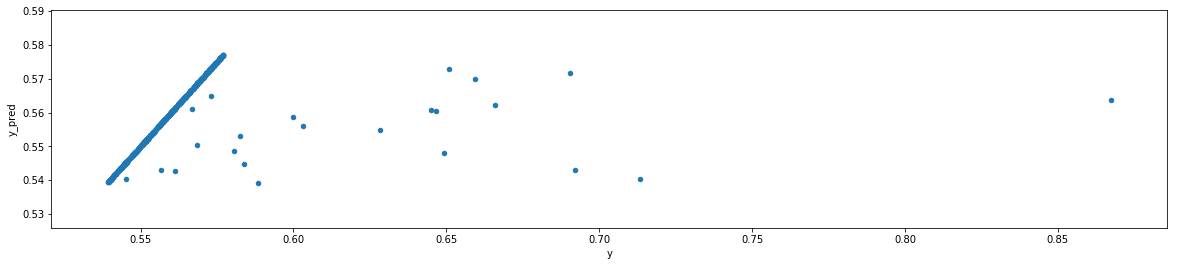

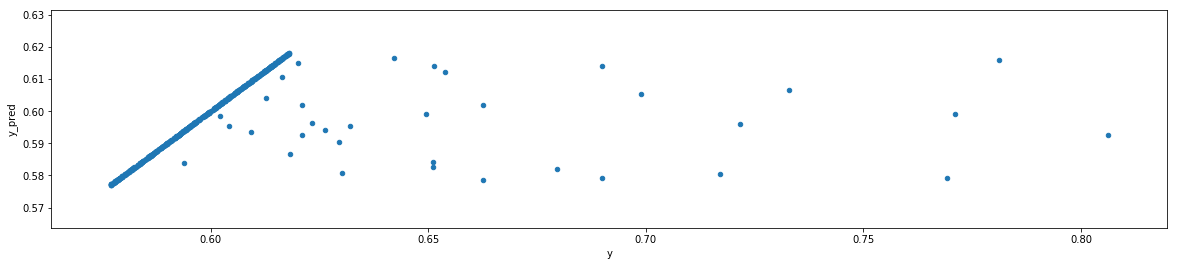

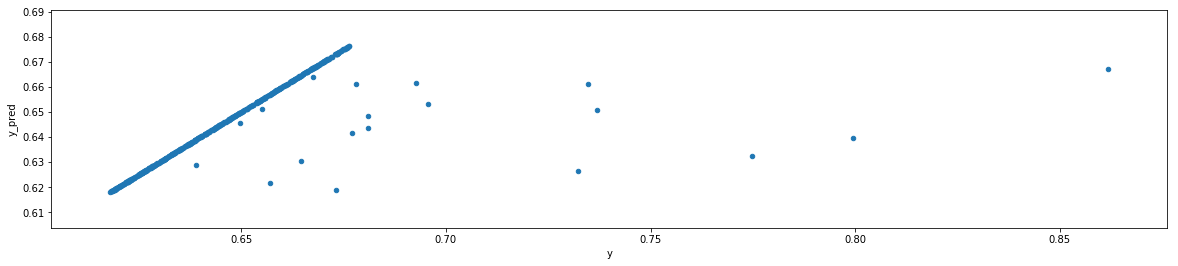

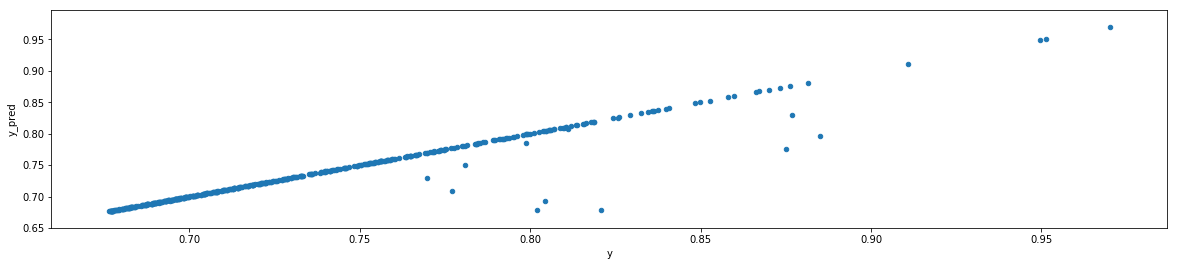

In [19]:
#By plotting the data we can see that the low spearman values are due to the fact that only some of the data is undervalued.
#If the data for one group was consistently penalized, then the spearman scores would actually be perfect I think

# Just because the predicted scores are lower, if the with-in group ordering is consistent, the nboth ranks will 
# increase monotonicly


kf = KFold(n_splits=10, shuffle=False, random_state=1)
df0 = df_under[df_under["g"]==0.]
    
print("Plot predicted vs true for UNDERestimated group")
for rest, bin in kf.split(df0):
    points = df0.sort_values("y_pred")
    vals = points.iloc[bin]
    vals.plot.scatter("y", "y_pred")
    


Plot predicted vs true for OVERestimated group


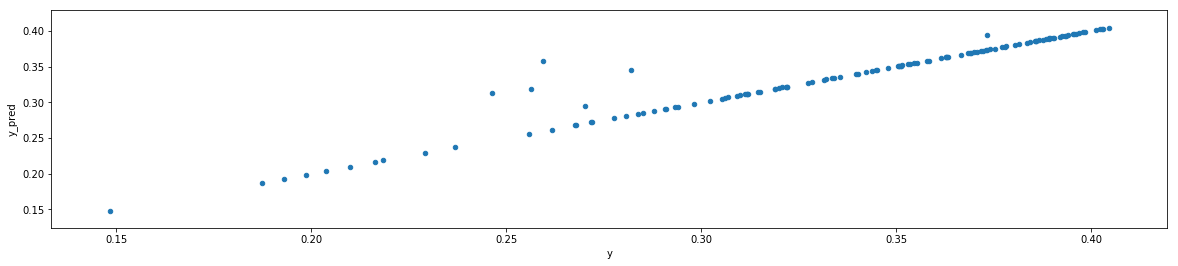

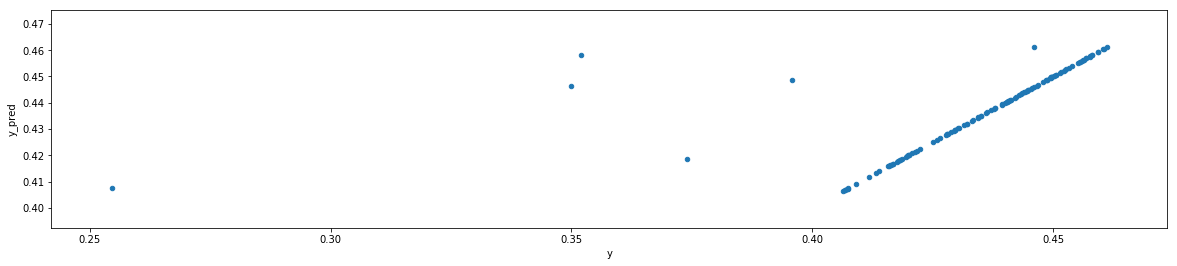

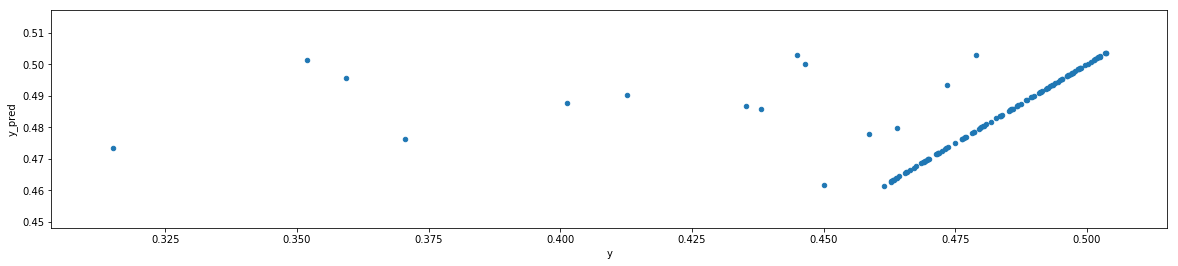

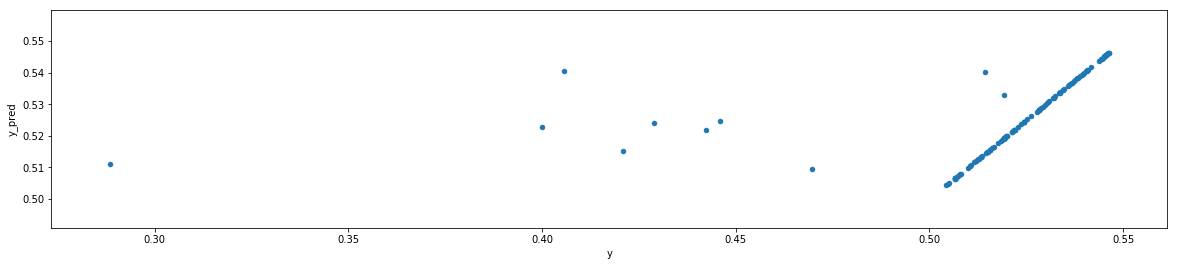

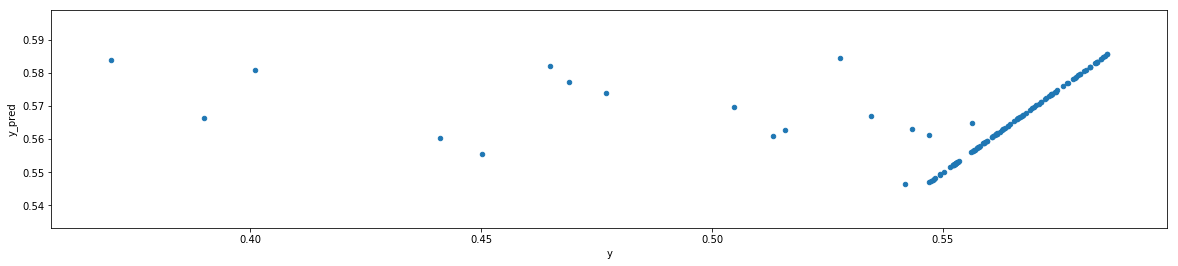

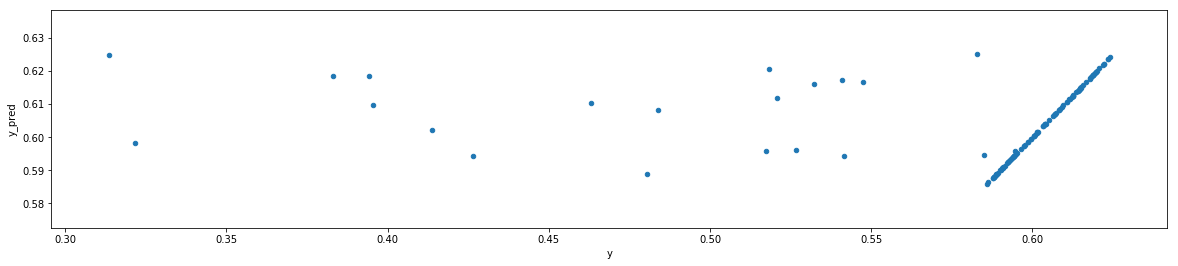

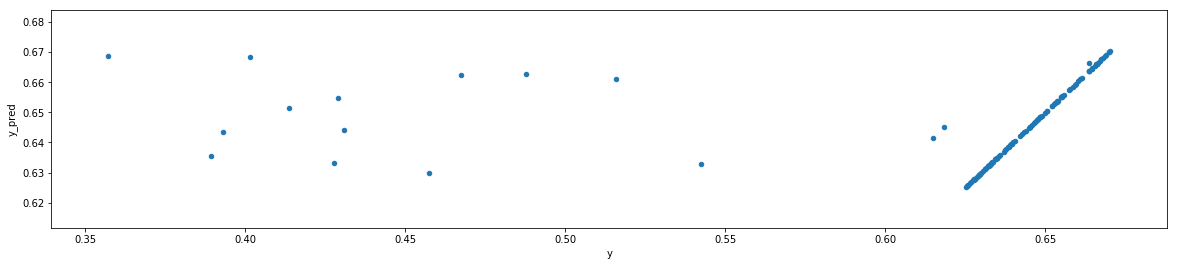

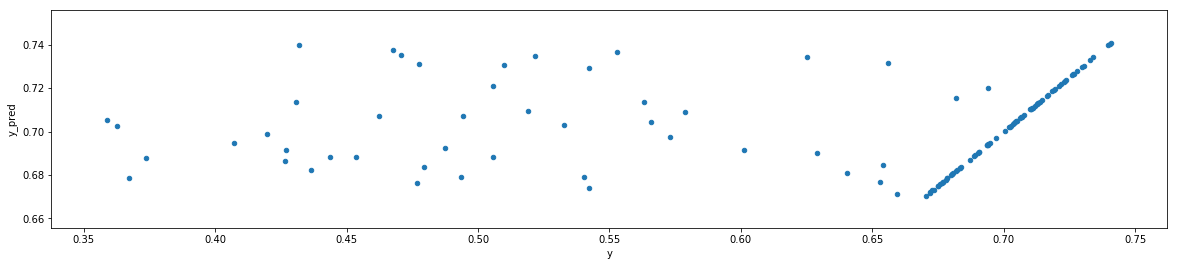

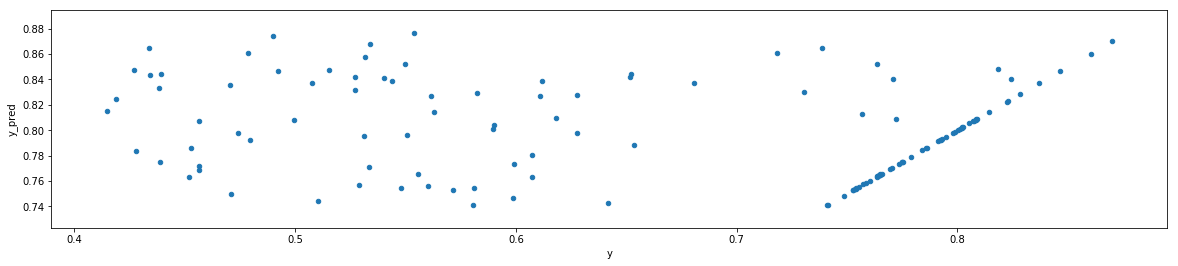

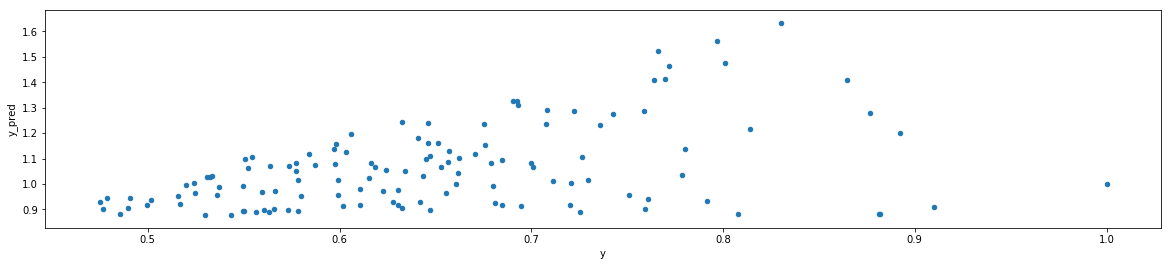

In [104]:
#By plotting the data we can see that the low spearman values are due to the fact that only some of the data is undervalued.
#If the data for one group was consistently penalized, then the spearman scores would actually be perfect I think

# Just because the predicted scores are lower, if the with-in group ordering is consistent, then both ranks will 
# increase monotonicly


kf = KFold(n_splits=10, shuffle=False, random_state=1)
df1 = df_over[df_over["g"]==1.]
    
print("Plot predicted vs true for OVERestimated group")
for rest, bin in kf.split(df1):
    points = df1.sort_values("y_pred")
    vals = points.iloc[bin]
    vals.plot.scatter("y", "y_pred")

Bin all points. Plot predicted vs true for each group


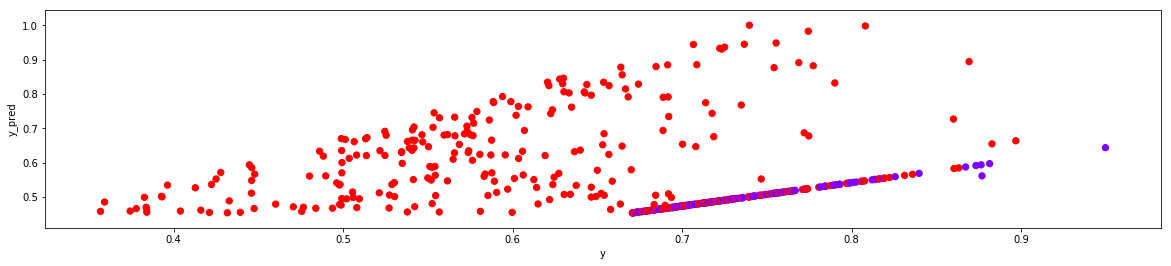

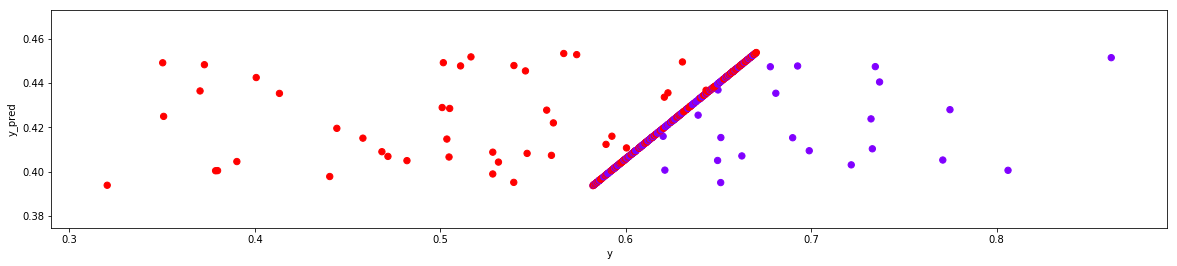

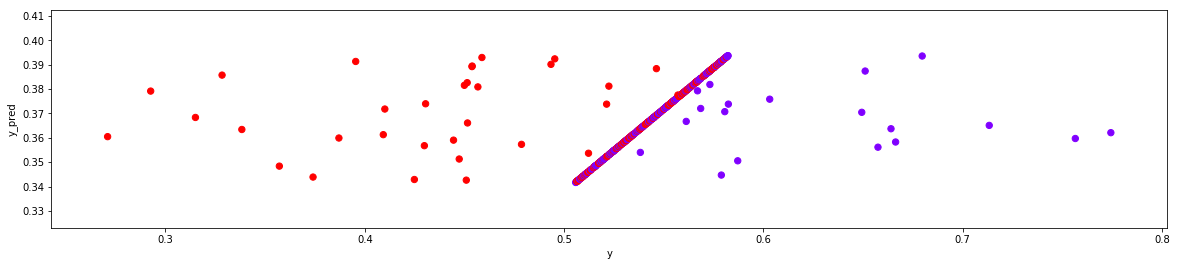

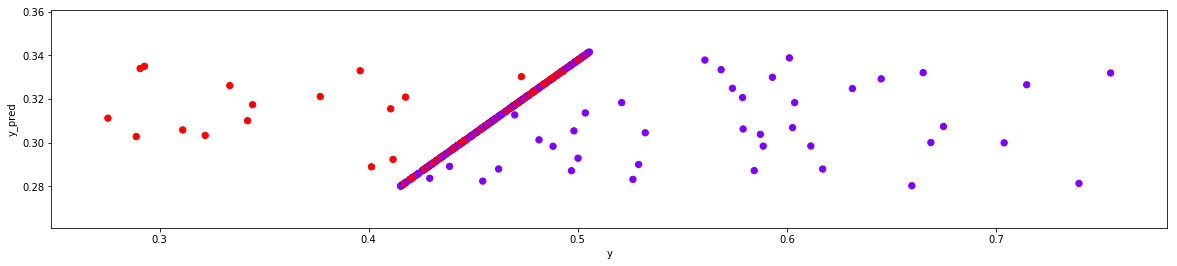

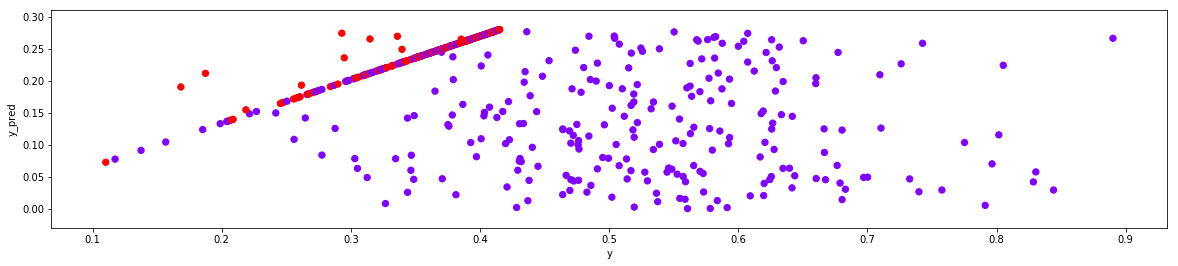

In [25]:
#By plotting the data we can see that the low spearman values are due to the fact that only some of the data is undervalued.
#If the data for one group was consistently penalized, then the spearman scores would actually be perfect I think

# Just because the predicted scores are lower, if the with-in group ordering is consistent, the nboth ranks will 
# increase monotonicly


kf = KFold(n_splits=5, shuffle=False, random_state=1)
df0 = df_over[df_over["g"]==0.]
df1 = df_over[df_over["g"]==1.]

print("Bin all points. Plot predicted vs true for each group")

bins = []
for rest, bin in kf.split(df_over):
    bins.append(bin)
bins.reverse()
for bin in bins:
    points = df_over.sort_values("y_pred")
    scale(points, "y_pred")
    vals = points.iloc[bin]
#     vals0 = points.iloc[bin][points["g"]==0.]
#     vals0.plot.scatter("y", "y_pred", color='red')
#     vals1 = points.iloc[bin][points["g"]==1.]
#     vals1.plot.scatter("y", "y_pred", color='purple')
    cmap = plt.cm.rainbow
    vals.plot.scatter("y", "y_pred", s=40, color=cmap((vals['g'])))
    
#     ax = df.plot.scatter(x='a', y='b', color='DarkBlue', label='Group 1');
#     df.plot.scatter(x='c', y='d', color='DarkGreen', label='Group 2', ax=ax);
    

In [64]:
t = train_test(df_under, 10, 10, 99)[['method', 'mse0', 'mse1', 'bin_mse_diff', 'ae0', 'ae1', 'bin_ae_diff', 'oe0',
       'oe1', 'bin_oe_diff', 'ue0', 'ue1', 'bin_ue_diff', 'spear0', 'spear1', 'bin_spear_diff']]
b = t[t["method"]=='baseline'].transpose()
b["total error"] = b.sum(axis=1)
b["total error"].iloc[0] = "baseline"
b

,0,1,2,3,4,5,6,7,8,9,total error
method,baseline,baseline,baseline,baseline,baseline,baseline,baseline,baseline,baseline,baseline,baseline
mse0,0.192973,0.05615,0.011339,0.00296564,0.0017525,0.000746713,0.000444453,0.000261212,0.000104747,0.000192235,0.26693
mse1,0,0,0,0,0,0,0,0,0,0,0
bin_mse_diff,0.192973,0.05615,0.011339,0.00296564,0.0017525,0.000746713,0.000444453,0.000261212,0.000104747,0.000192235,0.26693
ae0,155.857,67.483,17.5152,5.98154,4.30567,2.35792,1.46995,0.741643,0.690002,0.45187,256.854
ae1,0,0,0,0,0,0,0,0,0,0,0
bin_ae_diff,155.857,67.483,17.5152,5.98154,4.30567,2.35792,1.46995,0.741643,0.690002,0.45187,256.854
oe0,0,0,0,0,0,0,0,0,0,0,0
oe1,0,0,0,0,0,0,0,0,0,0,0
bin_oe_diff,0,0,0,0,0,0,0,0,0,0,0


In [65]:
c = t[t["method"]=='calibrate'].transpose()
c["total error"] = c.sum(axis=1)
c["total error"].iloc[0] = "calibrate"
c

,0,1,2,3,4,5,6,7,8,9,total error
method,calibrate,calibrate,calibrate,calibrate,calibrate,calibrate,calibrate,calibrate,calibrate,calibrate,calibrate
mse0,0.0184387,0.0185605,0.0172811,0.00299817,0.00172536,0.000674453,0.000444886,0.000261762,0.000105981,0.00019431,0.0606852
mse1,0.0101603,0.00424995,0.000101543,4.51168e-05,2.1514e-05,3.66922e-05,1.20044e-05,5.06217e-06,9.37269e-06,1.48165e-06,0.014643
bin_mse_diff,0.00827838,0.0143106,0.0171796,0.00295306,0.00170385,0.000637761,0.000432881,0.000256699,9.66082e-05,0.000192828,0.0460422
ae0,40.1359,41.4339,39.2342,10.4108,6.50008,3.56475,3.0748,1.33112,1.30183,0.576288,147.564
ae1,31.2449,17.5794,3.41113,2.27526,1.54102,1.85585,0.920582,0.361883,0.652816,0.112199,59.9551
bin_ae_diff,8.89094,23.8544,35.823,8.13552,4.95906,1.7089,2.15421,0.969238,0.649011,0.464089,87.6084
oe0,13.706,14.2211,13.5133,4.78679,2.38458,1.48178,1.69415,0.601495,0.668974,0.0953429,53.1536
oe1,31.2449,17.5794,3.41113,2.27526,1.54102,1.85585,0.920582,0.361883,0.652816,0.106343,59.9493
bin_oe_diff,17.5389,3.35834,10.1022,2.51153,0.843556,0.374069,0.773564,0.239612,0.0161579,0.011,35.769


In [66]:
cg = t[t["method"]=='cal_groups'].transpose()
cg["total error"] = cg.sum(axis=1)
cg["total error"].iloc[0] = "cal_groups"
cg

,0,1,2,3,4,5,6,7,8,9,total error
method,cal_groups,cal_groups,cal_groups,cal_groups,cal_groups,cal_groups,cal_groups,cal_groups,cal_groups,cal_groups,cal_groups
mse0,0.0161047,0.0170306,0.0181261,0.00302826,0.00154274,0.000899935,0.00051511,0.000275443,0.000123886,0.00019484,0.0578416
mse1,0.00014129,0,0,0,0,0,0,0,0,9.16899e-08,0.000141382
bin_mse_diff,0.0159634,0.0170306,0.0181261,0.00302826,0.00154274,0.000899935,0.00051511,0.000275443,0.000123886,0.000194748,0.0577002
ae0,39.806,41.8504,42.2341,14.7962,8.79706,5.96865,4.90903,2.11218,2.1503,0.738613,163.363
ae1,0.492917,0,0,0,0,0,0,0,0,0.00585594,0.498773
bin_ae_diff,39.3131,41.8504,42.2341,14.7962,8.79706,5.96865,4.90903,2.11218,2.1503,0.732757,162.864
oe0,21.3675,21.4058,21.0502,10.1154,5.34766,3.75732,3.59153,1.41584,1.54036,0.229021,89.8207
oe1,0.492917,0,0,0,0,0,0,0,0,0,0.492917
bin_oe_diff,20.8746,21.4058,21.0502,10.1154,5.34766,3.75732,3.59153,1.41584,1.54036,0.229021,89.3278


In [67]:
errs = pd.DataFrame()
errs["b"] = b["total error"]
errs["c"] = c["total error"]
errs["cg"] = cg["total error"]
errs

,b,c,cg
method,baseline,calibrate,cal_groups
mse0,0.26693,0.0606852,0.0578416
mse1,0,0.014643,0.000141382
bin_mse_diff,0.26693,0.0460422,0.0577002
ae0,256.854,147.564,163.363
ae1,0,59.9551,0.498773
bin_ae_diff,256.854,87.6084,162.864
oe0,0,53.1536,89.8207
oe1,0,59.9493,0.492917
bin_oe_diff,0,35.769,89.3278


Table above shows the way the errors are redistributed across groups.

mse - both calbration methods improve the fairness of the model. A small amount of error is introduced to group 1 (+.01), while a larger improvement is seen in the error for group 1 (-0.13)

But when we look at this in terms of absolute error, we see that calibration over all data introduces more error into the model than calibration by groups. Using calibration, group 0 has a substantial reduction in error (-100), but group1 gains (+60) for a net reduction in error of -40. Using calibration by groups, group0 is again reduced (-100) by only a small amount of error is introduced for group1 (+0.5) for a net improvement of (-99.5)

Next we break out the amount of over-estimation and under-estimation. In the baseline model we see there is 0 overestimation and -254 underestimation for group0. Both calibration methods greatly improve the amount of underestimation of group0 - by -147 for calibration and -172 for calibration by groups. Neither method introduces much error to group1(-0.4)

Unfortunately, both methods don't perform quite as well in terms of overestimation. We start with none, but calibration introduces +46 for group0 and +61 for group1. Calibration by groups does much better by group1 (+0.11) but adds more overestimation to group0 (+76)

group   c_over   c_under cg_over cg_under
g0      46       -107    75      -82
g1      61       -0.4    0.11      -0.4


We can see that when calibration is performed over both groups together, error can be introduced for group 1 unnecessarily. Calibration by groups does a better job of compensating for the bias against group0 without skewing the scores for group1 too much.

But this doesn't tell the whole story. We should consider the different treatment of grops at varying positions in the ranking, by examining the error for each bin. 